## Selecting Best Titles

### A. Clustering Best Titles

In [1]:
import pandas as pd

data_anime = pd.read_csv("RawAnimeData.csv")
data_anime = data_anime.drop(columns=["Unnamed: 0"])
data_anime = data_anime.drop_duplicates(subset=["jp_title"])
data_anime = data_anime.dropna()
data_anime.head()

,year,season,jp_title,img,Japanese,Episodes,Starting,Ending,Producers,Studios,Main Studio,Source,Age Rating,Rating Score,Reviewers,Rating Score Rank,Popularity Rank,Members,Favorites
0,2021,winter,Jujutsu Kaisen,https://cdn.myanimelist.net/images/anime/1171/...,呪術廻戦,24,3 Oct 2020,27 Mar 2021,"Mainichi Broadcasting System, TOHO animation, ...",MAPPA,MAPPA,Manga,R - 17+ (violence & profanity),8.56,1.809780e+13,110,13.0,2755845,93161
1,2021,winter,Yuru Camp△ Season 2,https://cdn.myanimelist.net/images/anime/1255/...,ゆるキャン△ SEASON2,13,7 Jan 2021,1 Apr 2021,"Half H.P Studio, MAGES., DeNA",C-Station,C-Station,Manga,PG-13 - Teens 13 or older,8.50,1.052540e+11,145,1091.0,238832,3105
2,2021,winter,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,https://cdn.myanimelist.net/images/anime/1724/...,Re：ゼロから始める異世界生活,12,6 Jan 2021,24 Mar 2021,"AT-X, Memory-Tech, Hakuhodo DY Music & Picture...",White Fox,White Fox,Light novel,R - 17+ (violence & profanity),8.43,5.687810e+11,180,183.0,969121,13012
3,2021,winter,Mushoku Tensei: Isekai Ittara Honki Dasu,https://cdn.myanimelist.net/images/anime/1530/...,無職転生 ～異世界行ったら本気だす～,11,11 Jan 2021,22 Mar 2021,"Frontier Works, TOHO, Magic Capsule, TOHO anim...",Studio Bind,Studio Bind,Light novel,R - 17+ (violence & profanity),8.36,8.876810e+11,227,95.0,1438841,36751
4,2021,winter,Tensei shitara Slime Datta Ken 2nd Season,https://cdn.myanimelist.net/images/anime/1271/...,転生したらスライムだった件,12,12 Jan 2021,30 Mar 2021,Kodansha,8bit,8bit,Manga,PG-13 - Teens 13 or older,8.36,5.985960e+11,231,161.0,1033610,10879


In [2]:
data_anime = data_anime[["jp_title", "Main Studio", "Episodes", "Rating Score", "Rating Score Rank", "Popularity Rank", "Members", "Favorites", "Reviewers"]]
data_anime.head()

,jp_title,Main Studio,Episodes,Rating Score,Rating Score Rank,Popularity Rank,Members,Favorites,Reviewers
0,Jujutsu Kaisen,MAPPA,24,8.56,110,13.0,2755845,93161,1.809780e+13
1,Yuru Camp△ Season 2,C-Station,13,8.50,145,1091.0,238832,3105,1.052540e+11
2,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,White Fox,12,8.43,180,183.0,969121,13012,5.687810e+11
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Studio Bind,11,8.36,227,95.0,1438841,36751,8.876810e+11
4,Tensei shitara Slime Datta Ken 2nd Season,8bit,12,8.36,231,161.0,1033610,10879,5.985960e+11


In [3]:
import numpy as np
import matplotlib.pyplot as plt

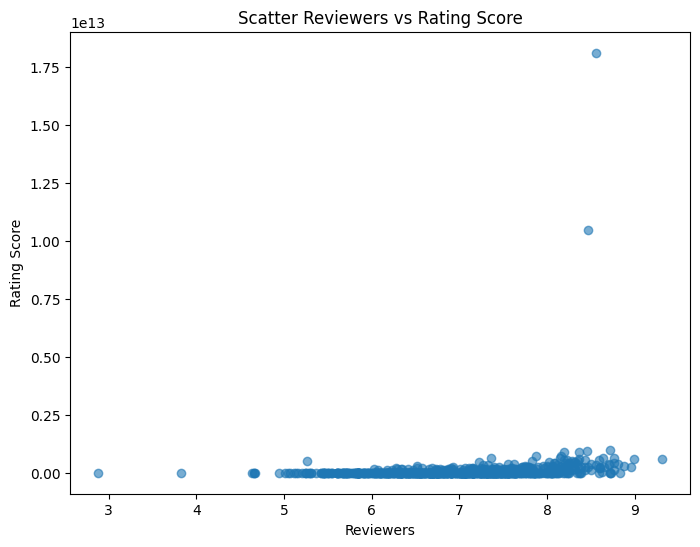

In [4]:
plt.figure(figsize=(8, 6))
plt.title("Scatter Reviewers vs Rating Score")
plt.xlabel("Reviewers")
plt.ylabel("Rating Score")

scatter = plt.scatter(
    x=data_anime["Rating Score"], 
    y=data_anime["Reviewers"], 
    alpha=0.6
);

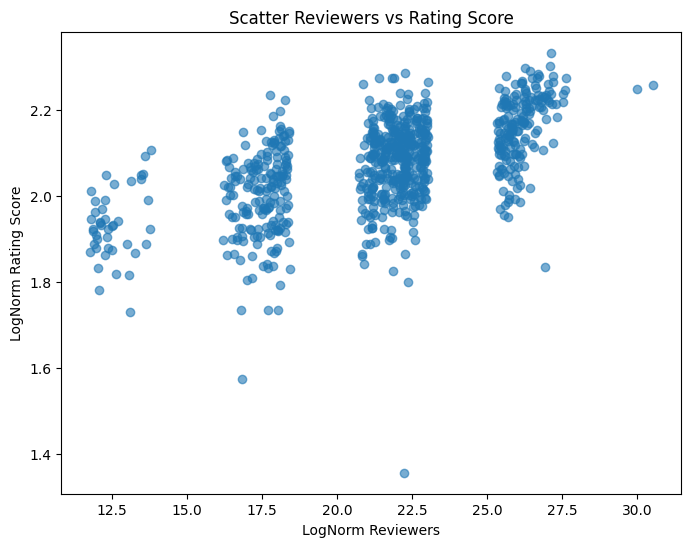

In [5]:
# Log Normal Transformation to Easily Spot the Differences
data_anime['log_norm_rating'] = np.log1p(data_anime['Rating Score'])
data_anime['log_norm_reviewers'] = np.log1p(data_anime['Reviewers'])

plt.figure(figsize=(8, 6))
plt.title("Scatter Reviewers vs Rating Score")
plt.xlabel("LogNorm Reviewers")
plt.ylabel("LogNorm Rating Score")

scatter = plt.scatter(
    x=data_anime["log_norm_reviewers"], 
    y=data_anime["log_norm_rating"], 
    alpha=0.6
);

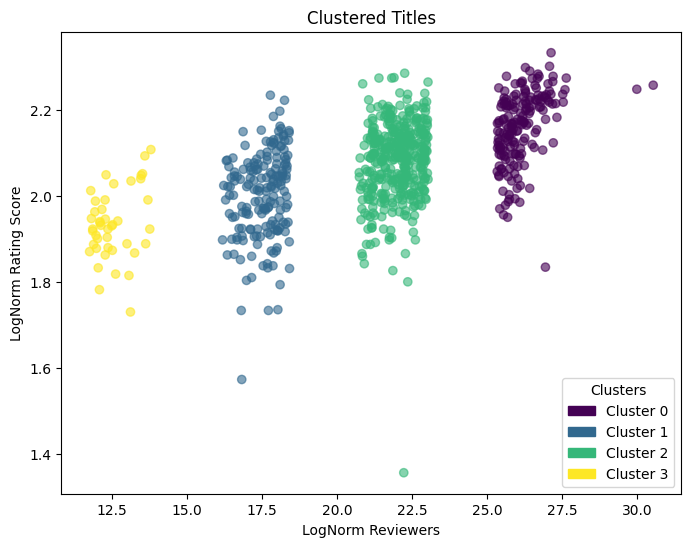

In [6]:
from sklearn.cluster import KMeans
from matplotlib.patches import Patch

cluster_features = ["log_norm_rating", "log_norm_reviewers"]

n_cluster = 4
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
data_anime["Cluster"] = kmeans.fit_predict(data_anime[cluster_features])

plt.figure(figsize=(8, 6))
plt.title("Clustered Titles")
plt.xlabel("LogNorm Reviewers")
plt.ylabel("LogNorm Rating Score")


scatter = plt.scatter(
    x=data_anime["log_norm_reviewers"], 
    y=data_anime["log_norm_rating"], 
    c=data_anime["Cluster"],  
    cmap='viridis', 
    alpha=0.6
)

handles = [Patch(color=scatter.cmap(scatter.norm(c)), label=f"Cluster {c}") 
           for c in np.unique(data_anime["Cluster"])]
plt.legend(handles=handles, title="Clusters", loc="lower right")

plt.show()

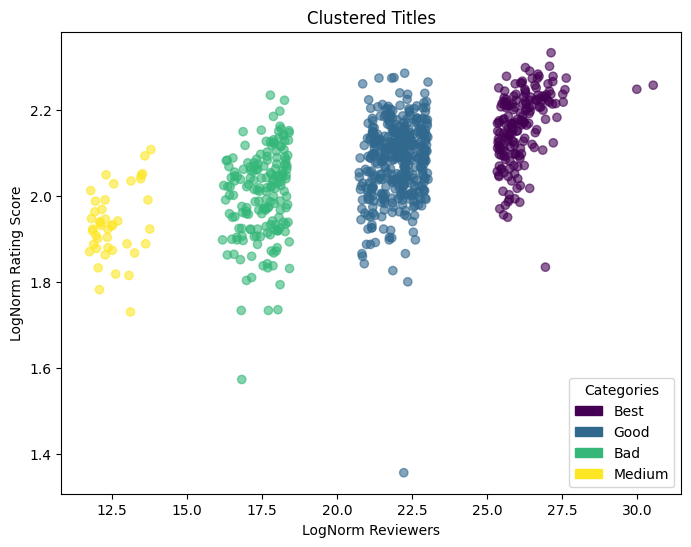

In [7]:
import matplotlib.patches as mpatches

data_anime['Category'] = data_anime['Cluster'].replace({0: 'Best', 1: 'Bad', 2: 'Good', 3: "Medium"})

plt.figure(figsize=(8, 6))
plt.title("Clustered Titles")
plt.xlabel("LogNorm Reviewers")
plt.ylabel("LogNorm Rating Score")

categories = data_anime["Category"].unique()
color_map = {cat: i for i, cat in enumerate(categories)}

scatter = plt.scatter(
    x=data_anime["log_norm_reviewers"], 
    y=data_anime["log_norm_rating"], 
    c=data_anime["Category"].map(color_map), 
    cmap='viridis', 
    alpha=0.6
)

legend_handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=cat) for cat, i in color_map.items()]

plt.legend(handles=legend_handles, title="Categories", loc="lower right")
plt.show()

In [8]:
pd.pivot_table(data_anime, values="Rating Score", index="Category", aggfunc="mean")

,Rating Score
Category,
Bad,6.443389
Best,7.704333
Good,7.041566
Medium,5.936512


In [9]:
data_best = data_anime.loc[data_anime['Category'] == 'Best']
data_best.head()

,jp_title,Main Studio,Episodes,Rating Score,Rating Score Rank,Popularity Rank,Members,Favorites,Reviewers,log_norm_rating,log_norm_reviewers,Cluster,Category
0,Jujutsu Kaisen,MAPPA,24,8.56,110,13.0,2755845,93161,1.809780e+13,2.257588,30.526811,0,Best
1,Yuru Camp△ Season 2,C-Station,13,8.50,145,1091.0,238832,3105,1.052540e+11,2.251292,25.379642,0,Best
2,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,White Fox,12,8.43,180,183.0,969121,13012,5.687810e+11,2.243896,27.066761,0,Best
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Studio Bind,11,8.36,227,95.0,1438841,36751,8.876810e+11,2.236445,27.511878,0,Best
4,Tensei shitara Slime Datta Ken 2nd Season,8bit,12,8.36,231,161.0,1033610,10879,5.985960e+11,2.236445,27.117853,0,Best


In [10]:
value = ["Reviewers", "Rating Score"]
# value = ["log_norm_rating", "log_norm_reviewers"]

# top 5
pivot_studio = pd.pivot_table(
    data_best, values=value, index="Main Studio", aggfunc="mean"
).sort_values(by=value, ascending=False).head(5)

pivot_studio

,Rating Score,Reviewers
Main Studio,,
MAPPA,8.388333,3.442926e+12
Wit Studio,8.330000,2.381146e+12
ufotable,8.342500,5.986010e+11
White Fox,8.430000,5.687810e+11
Studio Bind,8.415000,5.382620e+11


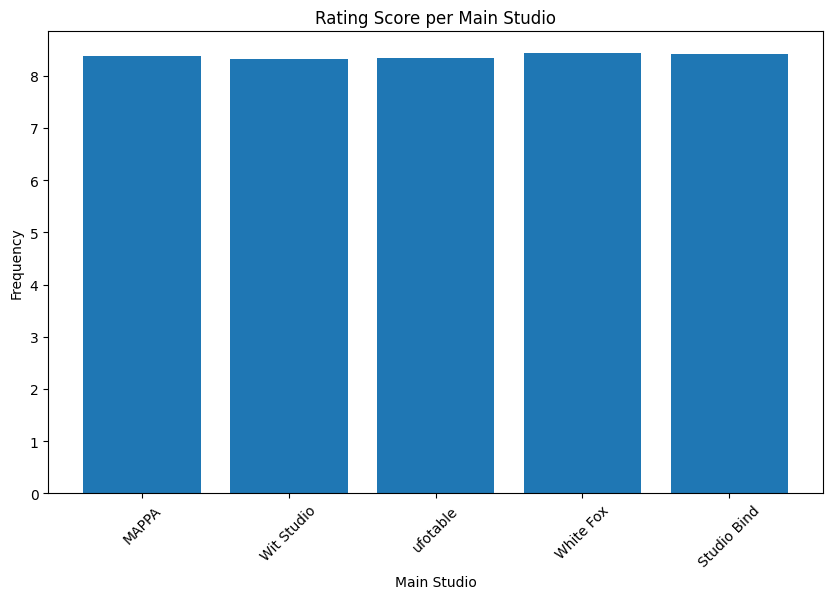

In [11]:
# Rating Score
plt.figure(figsize=(10, 6))
plt.bar(pivot_studio.index, pivot_studio["Rating Score"])
plt.xlabel("Main Studio")
plt.ylabel("Frequency")
plt.title("Rating Score per Main Studio")
plt.xticks(rotation=45)
plt.show();

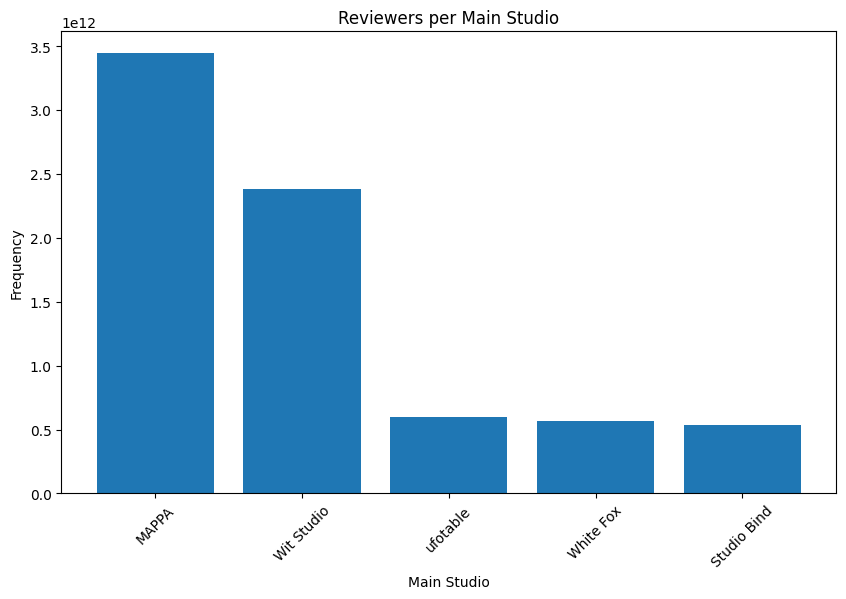

In [12]:
#  Reviewers
plt.figure(figsize=(10, 6))
plt.bar(pivot_studio.index, pivot_studio["Reviewers"])
plt.xlabel("Main Studio")
plt.ylabel("Frequency")
plt.title("Reviewers per Main Studio")
plt.xticks(rotation=45)
plt.show();

In [13]:
selected_studio = pivot_studio.index.values
print("The selected studio is:", selected_studio)

The selected studio is: ['MAPPA' 'Wit Studio' 'ufotable' 'White Fox' 'Studio Bind']


In [14]:
selected_dataset = data_best.loc[data_best['Main Studio'].isin(selected_studio)]

selected_dataset.head()

,jp_title,Main Studio,Episodes,Rating Score,Rating Score Rank,Popularity Rank,Members,Favorites,Reviewers,log_norm_rating,log_norm_reviewers,Cluster,Category
0,Jujutsu Kaisen,MAPPA,24,8.56,110,13.0,2755845,93161,1.809780e+13,2.257588,30.526811,0,Best
2,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,White Fox,12,8.43,180,183.0,969121,13012,5.687810e+11,2.243896,27.066761,0,Best
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Studio Bind,11,8.36,227,95.0,1438841,36751,8.876810e+11,2.236445,27.511878,0,Best
73,Vivy: Fluorite Eye's Song,Wit Studio,13,8.39,205,412.0,570600,11140,2.569810e+11,2.239645,26.272268,0,Best
185,Mushoku Tensei: Isekai Ittara Honki Dasu Part 2,Studio Bind,12,8.64,80,165.0,1016877,18964,6.369510e+11,2.265921,27.179959,0,Best


In [15]:
selected_dataset.jp_title.tolist()

['Jujutsu Kaisen',
 'Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season Part 2',
 'Mushoku Tensei: Isekai Ittara Honki Dasu',
 "Vivy: Fluorite Eye's Song",
 'Mushoku Tensei: Isekai Ittara Honki Dasu Part 2',
 'Ousama Ranking',
 'Kimetsu no Yaiba: Mugen Ressha-hen',
 'Kimetsu no Yaiba: Yuukaku-hen',
 'Spy x Family',
 'Chainsaw Man',
 'Spy x Family Part 2',
 'Vinland Saga Season 2',
 'Tondemo Skill de Isekai Hourou Meshi',
 'Kimetsu no Yaiba: Katanakaji no Sato-hen',
 'Jigokuraku',
 'Jujutsu Kaisen 2nd Season',
 'Mushoku Tensei II: Isekai Ittara Honki Dasu',
 'Spy x Family Season 2',
 'Mushoku Tensei II: Isekai Ittara Honki Dasu Part 2',
 'Kimetsu no Yaiba: Hashira Geiko-hen']

After we get the best title based on the "best" studio category

In [16]:
from ast import literal_eval

data_char = pd.read_csv("ColoredCharacterDataset.csv")
data_char = data_char.drop(columns=["Unnamed: 0"])

selected_char = data_char.loc[data_char['jp_title'].isin(selected_dataset['jp_title'].tolist())].copy()
selected_char = selected_char.reset_index(drop=True)

selected_char['colors'] = selected_char['colors'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

selected_char.head()

,jp_title,char_name,fav,img,colors
0,Mushoku Tensei: Isekai Ittara Honki Dasu,Rudeus Greyrat (ルーデウス・グレイラット),10221,https://cdn.myanimelist.net/images/characters/...,"[[221, 234, 246], [179, 215, 251], [140, 207, ..."
1,Mushoku Tensei: Isekai Ittara Honki Dasu,Roxy Migurdia (ロキシー・ミグルディア),9320,https://cdn.myanimelist.net/images/characters/...,"[[215, 231, 239], [182, 206, 247], [162, 196, ..."
2,Mushoku Tensei: Isekai Ittara Honki Dasu,Eris Boreas Greyrat (エリス・ボレアス・グレイラット),6158,https://cdn.myanimelist.net/images/characters/...,"[[202, 236, 253], [178, 224, 253], [205, 217, ..."
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Sylphiette (シルフィエット),3018,https://cdn.myanimelist.net/images/characters/...,"[[216, 233, 243], [185, 221, 251], [172, 209, ..."
4,Mushoku Tensei: Isekai Ittara Honki Dasu,Orsted (オルステッド),769,https://cdn.myanimelist.net/images/characters/...,"[[143, 176, 246], [133, 167, 243], [138, 161, ..."


In [17]:
all_colors = np.array([color for sublist in selected_char['colors'] if isinstance(sublist, list) for color in sublist])

print("Number of character:", len(selected_char['colors'])) 
print("Expected shape:", (len(selected_char['colors'])*30, 3))
print("Real shape:", all_colors.shape)
print("Flatten:", 9240*3)

Number of character: 120
Expected shape: (3600, 3)
Real shape: (3600, 3)
Flatten: 27720


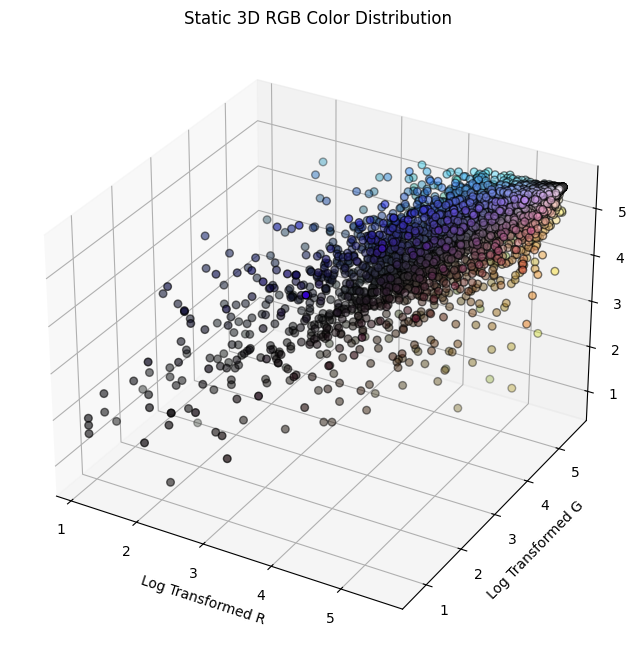

C:\Users\acer\AppData\Local\Temp\ipykernel_11916\3102446350.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [18]:
df_rgb = pd.DataFrame(all_colors, columns=['R', 'G', 'B'])

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply log transformation for better separation
df_rgb_transformed = df_rgb.copy()
df_rgb_transformed[['R', 'G', 'B']] = np.log1p(df_rgb[['R', 'G', 'B']])

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each color point with its true RGB color
ax.scatter(
    df_rgb_transformed['R'], 
    df_rgb_transformed['G'], 
    df_rgb_transformed['B'], 
    c=df_rgb[['R', 'G', 'B']]/255,  # Normalize RGB values for Matplotlib
    marker='o', s=30, edgecolors='k'
)

# Labels and title
ax.set_xlabel("Log Transformed R")
ax.set_ylabel("Log Transformed G")
ax.set_zlabel("Log Transformed B")
ax.set_title("Static 3D RGB Color Distribution")

plt.show()

fig.show()


In [19]:
from sklearn.cluster import KMeans
from collections import Counter

# Perform clustering to group similar colors
num_clusters = 9  # You can adjust this based on dataset size
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=1000)
kmeans.fit(all_colors)

# Count occurrences of each cluster
cluster_counts = Counter(kmeans.labels_)

print(cluster_counts)

# Find the most common cluster
most_common_cluster = max(cluster_counts, key=cluster_counts.get)

# Get the representative color of the most common cluster
most_common_color = kmeans.cluster_centers_[most_common_cluster].astype(int)

print(f"Most used color (clustered): {most_common_color}")

Counter({6: 573, 5: 533, 1: 473, 3: 439, 0: 437, 4: 397, 8: 327, 2: 284, 7: 137})
Most used color (clustered): [58 60 71]


In [ ]:
# Number of samples per cluster to visualize
samples_per_cluster = 30

# Create a figure
fig, axes = plt.subplots(num_clusters, samples_per_cluster, figsize=(samples_per_cluster, num_clusters))
fig.suptitle("20 Sample Colors from Each Cluster", fontsize=14)

for cluster_idx in range(num_clusters):
    # Get indices of colors belonging to the current cluster
    cluster_indices = np.where(kmeans.labels_ == cluster_idx)[0]
    
    # Select up to `samples_per_cluster` colors
    selected_indices = np.random.choice(cluster_indices, min(samples_per_cluster, len(cluster_indices)), replace=False)
    selected_colors = all_colors[selected_indices]

    for j, color in enumerate(selected_colors):
        axes[cluster_idx, j].imshow([[color / 255.0]])  # Normalize for matplotlib
        axes[cluster_idx, j].axis("off")  # Remove axis labels

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

menghitung untuk setiap cluster itu ada berapa aja pada setiap character anime

In [ ]:
sample_colors = np.array(selected_char.colors[0])

for color in sample_colors:
    color = color.reshape(-1, 3)
    # print(color.shape)
    result = kmeans.predict(color)
    print(result[0])


1
5
5
5
5
2
0
2
2
2
0
8
8
4
8
6
6
6
3
3
3
3
6
6
4
4
8
0
5
1


In [ ]:
# import pandas as pd

# # Load the dataset
# data_anime = pd.read_csv("FullCompleteDataset.csv", delimiter=";")

# # Create an empty list to store sampled rows
# sampled_data = []

# # Loop through each unique status and take a sample of 10 rows
# for status in data_anime["Status"].unique():
#     sampled_rows = data_anime.loc[data_anime["Status"] == status].sample(30)
#     sampled_data.append(sampled_rows)

# # Concatenate all sampled rows into a new DataFrame
# new_dataset = pd.concat(sampled_data)

# # Save the new dataset to a CSV file
# new_dataset.to_csv("Sampled_Anime_Dataset.csv", index=False)


In [ ]:
# # Display the first few rows of the new dataset
# new_dataset.head(10)

In [ ]:
# for cluster in sorted(data.Cluster.unique()):
#     print(data.loc[data.Cluster == cluster].sample(5).Main_Studio.tolist())

In [ ]:
# for cluster in sorted(data.Cluster.unique()):
#     data_sampling = data.loc[data.Cluster == cluster]
#     print(f"[Cluster {cluster} with {data_sampling.shape[0]} studios]")

#     print("Rating Score", round(data_sampling["Rating Score"].mean(), 2))
#     print("Max", round(data_sampling["Rating Score"].max(), 2))
#     print("Min", round(data_sampling["Rating Score"].min(), 2))

#     print("Reviewers", round(data_sampling["Reviewers"].mean()))
#     print("Max", round(data_sampling["Reviewers"].max()))
#     print("Min", round(data_sampling["Reviewers"].min()))

#     print("\n")

#     # print(data_sampling.Main_Studio.tolist()[:5])